In [1]:
import pandas as pd

colunas = ['PROCESSO', 'EMENTA', 'ROTULO_MANUAL']

ementas_df = pd.read_csv('../data/ementas_rotulos_manual.csv', header=0, sep=',', quotechar='"', usecols=colunas)

ementas_df.shape

(9914, 3)

In [2]:
analisar_frase = False

if analisar_frase:
    for index, row in ementas_df.iterrows():
        for lei in re.findall('([^\s]+)?\s+([^\s]+)?\s+(\d*\.?\d+\/\d{2,4})[^\d\/]', row['EMENTA'].lower()):
            print(lei)

In [17]:
import re

def lei_valida(lei):
    return not re.match("^[\d\.]+/\d{3}$", lei)

def extrair_leis(texto):
    terms = re.findall('\s(\d*\.?\d+\/\d{2,4})[^\d\/]', texto.lower())
    return filter(lei_valida, terms)

In [18]:
def normalizar_lei(lei, ementa):
    (numero, ano) = lei.split('/');
    return '{}/{}'.format(normalizar_numero(numero), normalizar_ano(ano))

def normalizar_numero(numero):
    return int(numero.replace('.', ''))

def normalizar_ano(numero):
    ano = int(numero)
    if (ano < 20):
        return '20' + numero
    if (ano < 100):
        return '19' + numero
    return numero

def extrair_artigos(texto):
    texto = texto.replace('art.', 'artigo')
    terms = re.findall('\s(artigo \d*\.?\d+)', texto.lower())
    return terms

In [20]:
leis = []

for index, row in ementas_df.iterrows():
    for art in extrair_artigos(row['EMENTA']):
        numero = art.replace('.', '')
        leis.append([row['PROCESSO'], numero]);
        
    for lei in extrair_leis(row['EMENTA']):
        norm = normalizar_lei(lei, row['EMENTA'])
        leis.append([row['PROCESSO'], norm]);


In [21]:
len(leis)

10992

In [22]:
leis_df = pd.DataFrame(data=leis, columns = ['PROCESSO', 'LEI'])

df = pd.merge(ementas_df, leis_df, on=['PROCESSO'])

df.head()

,PROCESSO,EMENTA,ROTULO_MANUAL,LEI
0,00039604720138240039,<br> EMBARGOS DE DECLARAÇÃO. PRETENDIDA REDI...,CDC,artigo 535
1,00039604720138240039,<br> EMBARGOS DE DECLARAÇÃO. PRETENDIDA REDI...,CDC,9656/1998
2,00039604720138240039,<br> EMBARGOS DE DECLARAÇÃO. PRETENDIDA REDI...,CDC,616/2012
3,00039604720138240039,<br> APELAÇÃO CÍVEL. AÇÃO DECLARATÓRIA C/C R...,CDC,artigo 535
4,00039604720138240039,<br> APELAÇÃO CÍVEL. AÇÃO DECLARATÓRIA C/C R...,CDC,9656/1998


Sem normalizar foram encontrados 1679 leis únicas

In [23]:
df.describe()

,PROCESSO,EMENTA,ROTULO_MANUAL,LEI
count,26814,26814,26814,26814
unique,3241,4358,28,713
top,40094280220178240000,<br> EMBARGOS DE DECLARAÇÃO EM AGRAVO DE INS...,EXP,artigo 1022
freq,864,604,7204,5388


In [24]:
groupby = df.groupby('LEI')

groupby[['LEI']].count().head()

,LEI
LEI,
1/1975,9
1/2012,1
100/2015,1
101/2010,4
10144/2002,2


In [25]:
c = groupby.filter(lambda x: len(x) > 100)

c.head()

,PROCESSO,EMENTA,ROTULO_MANUAL,LEI
0,00039604720138240039,<br> EMBARGOS DE DECLARAÇÃO. PRETENDIDA REDI...,CDC,artigo 535
1,00039604720138240039,<br> EMBARGOS DE DECLARAÇÃO. PRETENDIDA REDI...,CDC,9656/1998
3,00039604720138240039,<br> APELAÇÃO CÍVEL. AÇÃO DECLARATÓRIA C/C R...,CDC,artigo 535
4,00039604720138240039,<br> APELAÇÃO CÍVEL. AÇÃO DECLARATÓRIA C/C R...,CDC,9656/1998
6,00039604720138240039,<br> EMBARGOS DE DECLARAÇÃO. SUSCITAÇÃO DE C...,CDC,artigo 535


In [26]:
df_g = df.groupby(by=['ROTULO_MANUAL', 'LEI'])['ROTULO_MANUAL'].count().unstack('ROTULO_MANUAL', fill_value=0)

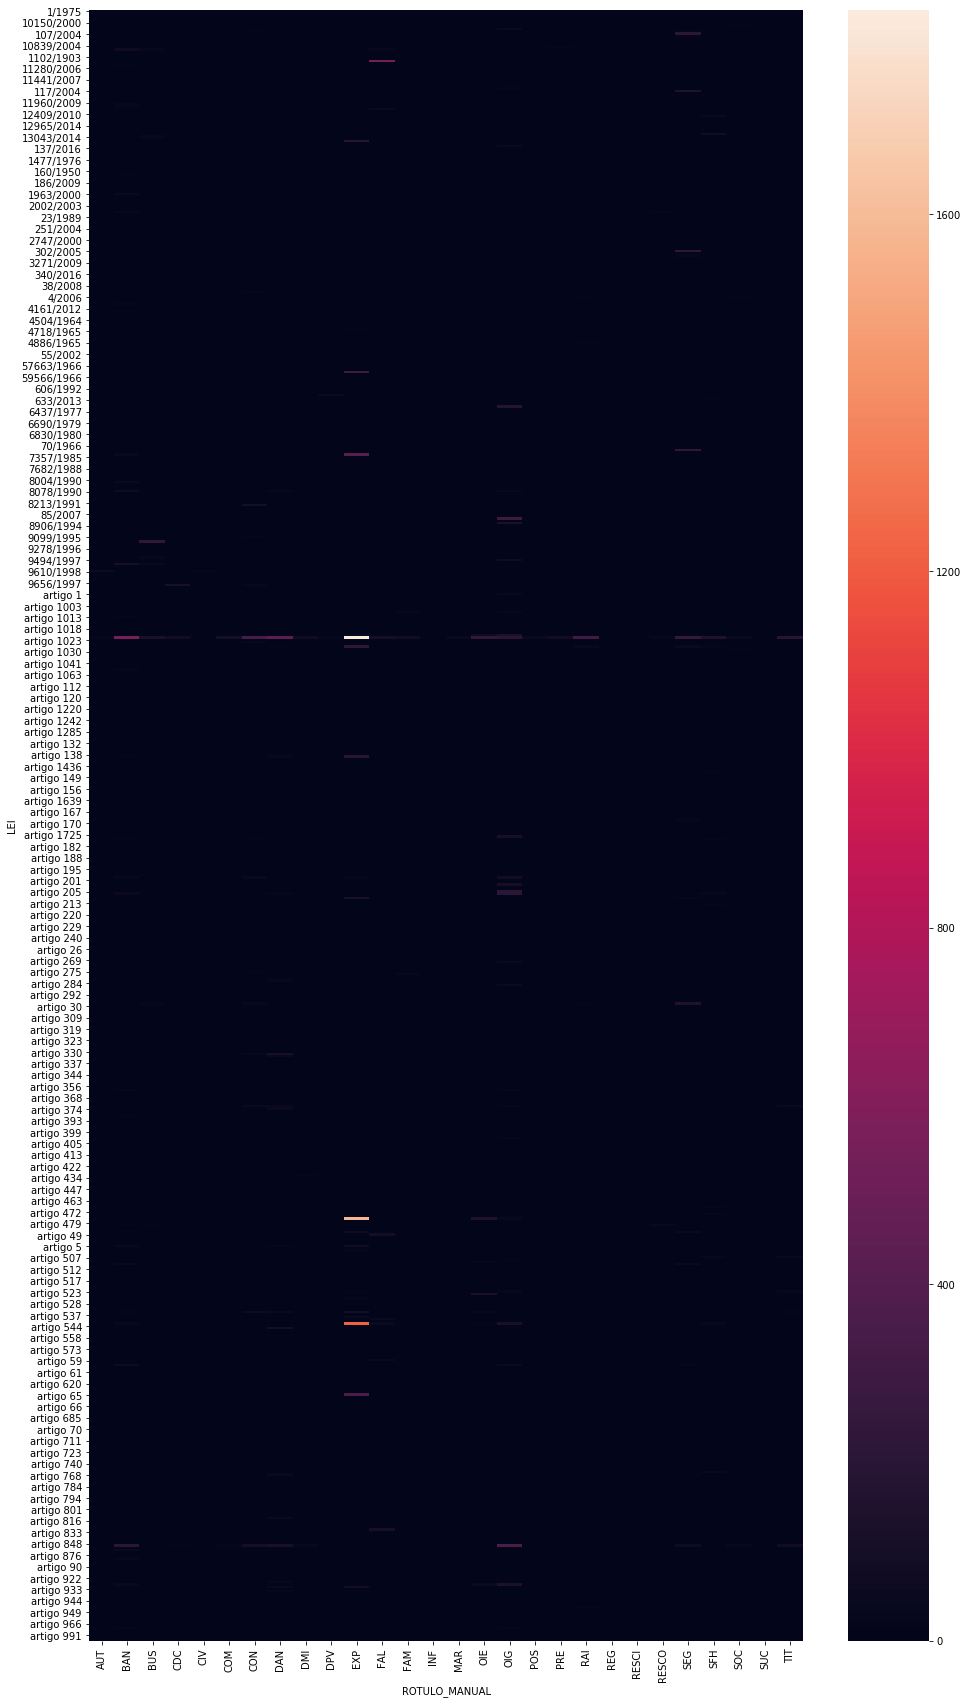

In [28]:
import seaborn as sns
from matplotlib import pyplot

pyplot.figure(figsize = (16,30))
ax = sns.heatmap(df_g)

In [29]:
df.to_csv('../data/leis.csv')